In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv("C:\\Users\\dnson\\Downloads\\manufacturing_dataset_1000_samples.csv")

In [3]:
print(df.shape)
print(df.columns)
print(df.head())

(1000, 19)
Index(['Timestamp', 'Injection_Temperature', 'Injection_Pressure',
       'Cycle_Time', 'Cooling_Time', 'Material_Viscosity',
       'Ambient_Temperature', 'Machine_Age', 'Operator_Experience',
       'Maintenance_Hours', 'Shift', 'Machine_Type', 'Material_Grade',
       'Day_of_Week', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time',
       'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour'],
      dtype='object')
             Timestamp  Injection_Temperature  Injection_Pressure  Cycle_Time  \
0  2023-01-01 00:00:00                  221.0               136.0        28.7   
1  2023-01-01 01:00:00                  213.3               128.9        34.5   
2  2023-01-01 02:00:00                  222.8               115.9        19.9   
3  2023-01-01 03:00:00                  233.3               105.3        39.2   
4  2023-01-01 04:00:00                  212.2               125.5        45.0   

   Cooling_Time  Material_Viscosity  Ambient_Temperature  Machine_Age  \
0

In [4]:
# Fill missing numerical values with column mean
num_cols = ['Material_Viscosity', 'Ambient_Temperature', 'Operator_Experience']
for col in num_cols:
    df[col] = df[col].fillna(df[col].mean())

# Check if any missing values remain
print("\nMissing values after handling:\n", df.isnull().sum())


Missing values after handling:
 Timestamp                     0
Injection_Temperature         0
Injection_Pressure            0
Cycle_Time                    0
Cooling_Time                  0
Material_Viscosity            0
Ambient_Temperature           0
Machine_Age                   0
Operator_Experience           0
Maintenance_Hours             0
Shift                         0
Machine_Type                  0
Material_Grade                0
Day_of_Week                   0
Temperature_Pressure_Ratio    0
Total_Cycle_Time              0
Efficiency_Score              0
Machine_Utilization           0
Parts_Per_Hour                0
dtype: int64


In [5]:
# Identify categorical columns
cat_cols = ['Shift', 'Machine_Type', 'Material_Grade', 'Day_of_Week']

# Apply One-Hot Encoding (convert categories into binary columns)
# drop_first=True to avoid dummy variable trap
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

# Display updated columns after encoding
print("\nColumns after encoding categorical variables:\n", df.columns)


Columns after encoding categorical variables:
 Index(['Timestamp', 'Injection_Temperature', 'Injection_Pressure',
       'Cycle_Time', 'Cooling_Time', 'Material_Viscosity',
       'Ambient_Temperature', 'Machine_Age', 'Operator_Experience',
       'Maintenance_Hours', 'Temperature_Pressure_Ratio', 'Total_Cycle_Time',
       'Efficiency_Score', 'Machine_Utilization', 'Parts_Per_Hour',
       'Shift_Evening', 'Shift_Night', 'Machine_Type_Type_B',
       'Machine_Type_Type_C', 'Material_Grade_Premium',
       'Material_Grade_Standard', 'Day_of_Week_Monday', 'Day_of_Week_Saturday',
       'Day_of_Week_Sunday', 'Day_of_Week_Thursday', 'Day_of_Week_Tuesday',
       'Day_of_Week_Wednesday'],
      dtype='object')


In [6]:
# Target variable: 'Parts_Per_Hour'
# Features: all other columns
X = df.drop('Parts_Per_Hour', axis=1)
y = df['Parts_Per_Hour']

# Display feature and target dimensions
print("\nFeature Matrix Shape:", X.shape)
print("Target Vector Shape:", y.shape)


Feature Matrix Shape: (1000, 26)
Target Vector Shape: (1000,)


In [10]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [11]:
# Split dataset into 80% training and 20% testing data
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

print("\nTraining set size:", X_train.shape)
print("Test set size:", X_test.shape)


Training set size: (800, 29)
Test set size: (200, 29)


In [12]:
# Initialize the Linear Regression model
model = LinearRegression()

# Fit model on training data
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [13]:
# Predict output for test data
y_pred = model.predict(X_test)

In [14]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# R² Score (explains variance explained by model)
r2 = r2_score(y_test, y_pred)

# Print performance metrics
print("\nModel Evaluation Metrics:")
print("--------------------------")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)


Model Evaluation Metrics:
--------------------------
Mean Squared Error (MSE): 12.300541808831586
Root Mean Squared Error (RMSE): 3.507212826281232
R² Score: 0.9057378099076147


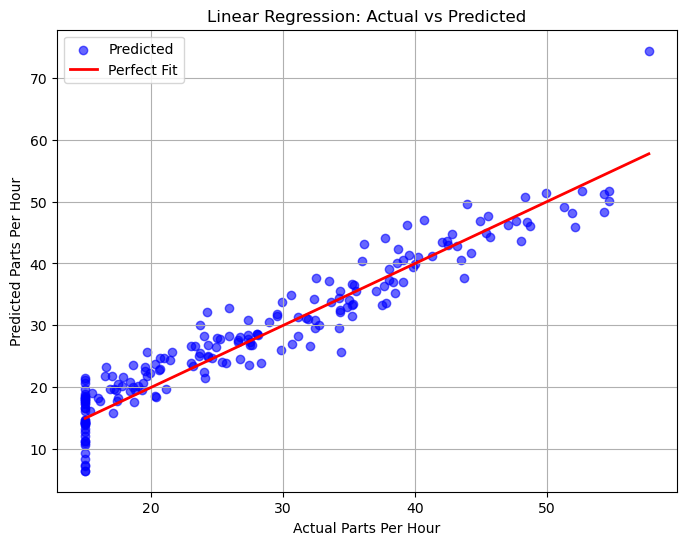

In [17]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6, color="blue", label="Predicted")
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2, label="Perfect Fit")
plt.xlabel("Actual Parts Per Hour")
plt.ylabel("Predicted Parts Per Hour")
plt.title("Linear Regression: Actual vs Predicted")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
# Create a DataFrame to show model coefficients
coeff_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

# Sort features by coefficient value (importance)
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

print("\nTop 10 Most Influential Features on Output:")
print(coeff_df.head(10))


Top 10 Most Influential Features on Output:
                    Feature  Coefficient
11         Efficiency_Score     3.029602
3              Cooling_Time     2.692804
0     Injection_Temperature     2.344650
17   Material_Grade_Premium     1.274096
1        Injection_Pressure     1.199653
7       Operator_Experience     0.962954
18  Material_Grade_Standard     0.812800
24    Day_of_Week_Wednesday     0.629791
22     Day_of_Week_Thursday     0.332154
23      Day_of_Week_Tuesday     0.259361
